In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load the data

In [2]:
datafile = 'mcmc_data/data.csv'

In [3]:
data = np.loadtxt(datafile, usecols=(0,1,2), delimiter=',', comments='#')

In [4]:
x = data[:,0]
y = data[:,1]
yerr = data[:,2]

In [5]:
def plot_data():
    plt.errorbar(x, y, yerr=yerr, marker='o', markersize=4, ls='', color='k')
    plt.xlim(0,5)
    plt.ylim(5,10)
    return

plot_data()

## Set up the probability functions

In [6]:
def ln_likelihood(x, y, yerr, modelfunc, params):
    model_y = modelfunc(params, x)
    chi = (y - model_y)/yerr
    return -0.5*np.sum(chi**2)

In [7]:
## Prior: all parameter values must be within boundaries set here
BOUNDARIES = [(-100,100),(-100,100),(-100,100),(-100,100)]

def ln_prior(params, bound=BOUNDARIES):
    result = 0.0
    for i in range(len(params)):
        if params[i]<bound[i][0] or params[i]>bound[i][1] : result = -np.inf 
    return result

In [8]:
## Here's a linear model with parameters m and b
def lin_model(params, x):
    m, b = params
    return m*x + b

In [9]:
def lnprob(params, x, y, yerr):
    return ln_likelihood(x, y, yerr, lin_model, params) + ln_prior(params)

## Use *emcee* to run MCMC

In [10]:
NWALKERS = 100
NDIMS    = 2
theta0   = np.zeros(shape=(NWALKERS,NDIMS))

In [11]:
## By eye fit: slope = 3/5 = 0.6, b = 6
## Initialize around those values
theta0[:,0] = np.random.uniform(-100.0,100.0,NWALKERS)
theta0[:,1] = np.random.uniform(-100.0,100.0,NWALKERS)

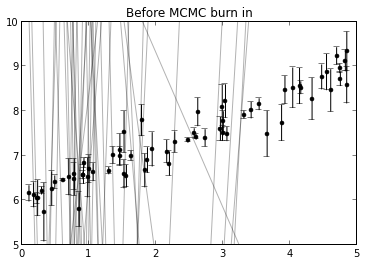

In [12]:
## Plot some of the initial walkers
plot_data()

for theta in theta0:
    plt.plot(x, lin_model(theta,x), 'k-', lw=1, alpha=0.3)

plt.title('Before MCMC burn in')

In [13]:
import emcee

In [14]:
sampler = emcee.EnsembleSampler(NWALKERS, NDIMS, lnprob, args=[x,y,yerr])

In [15]:
NBURN = 100
theta, prob, state = sampler.run_mcmc(theta0, NBURN)

In [16]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.441


In [17]:
## Plot new walker positions
plot_data()

for th in theta:
    plt.plot(x, lin_model(th,x), 'b-', lw=1, alpha=0.3)

plt.title('After MCMC burn in')

In [18]:
sampler.reset()

In [19]:
NSTEPS = 1000
theta2, prob2, state2 = sampler.run_mcmc(theta, NSTEPS)

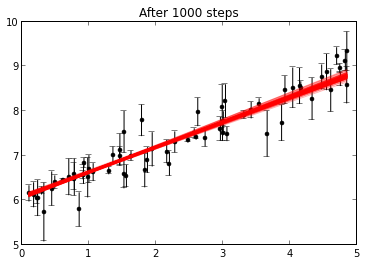

In [20]:
## Plot final state
plot_data()

for th in theta2:
    plt.plot(x, lin_model(th,x), 'r-', lw=1, alpha=0.3)

plt.title('After 1000 steps')

In [21]:
import triangle

Quantiles:
[(0.16, 0.54685708031923153), (0.5, 0.55934823748729001), (0.84, 0.57187291143801999)]
Quantiles:
[(0.16, 6.0459087315760609), (0.5, 6.0704064532904995), (0.84, 6.0947244210933595)]


(<matplotlib.figure.Figure at 0x103088890>,)

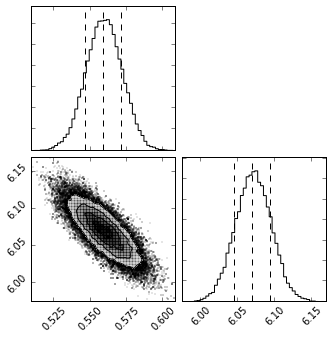

In [22]:
triangle.corner(sampler.flatchain, quantiles=[0.16,0.5,0.84]),

## Model with a quadratic

In [23]:
def quad_model(params, x):
    m, b, a = params
    return a*x**2 + m*x + b

In [24]:
def lnprob_quad(params, x, y, yerr):
    return ln_likelihood(x, y, yerr, quad_model, params) + ln_prior(params)

In [25]:
NWALKERS = 100
NDIMS    = 3

quadsampler = emcee.EnsembleSampler(NWALKERS, NDIMS, lnprob_quad, args=(x,y,yerr))

In [26]:
## Initialize new walkers
theta0 = np.zeros(shape=(NWALKERS,NDIMS))
theta0[:,0] = np.random.uniform(-100,100,NWALKERS)
theta0[:,1] = np.random.uniform(-100,100,NWALKERS)
theta0[:,2] = np.random.uniform(-100,100,NWALKERS)

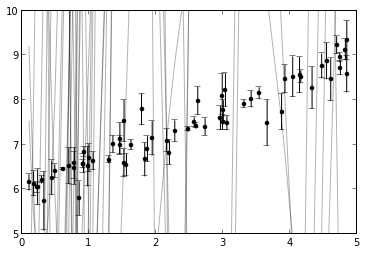

In [27]:
plot_data()

for th in theta0:
    plt.plot(x, quad_model(th,x), 'k-', alpha=0.3)

In [28]:
NBURN = 1000
theta, prob, state = quadsampler.run_mcmc(theta0, NBURN)

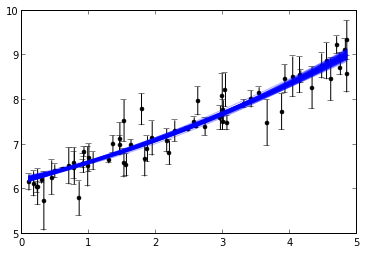

In [29]:
plot_data()

for th in theta:
    plt.plot(x, quad_model(th,x), 'b-', alpha=0.3)

In [30]:
quadsampler.reset()

In [31]:
NSTEPS = 1000
theta2, prob2, state2 = quadsampler.run_mcmc(theta, NSTEPS)

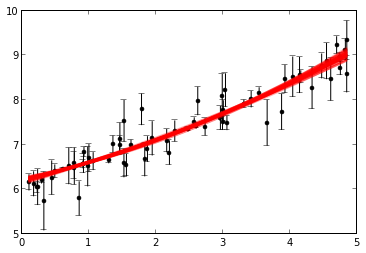

In [32]:
plot_data()

for th in theta2:
    plt.plot(x, quad_model(th,x), 'r-', alpha=0.3)

Quantiles:
[(0.16, 0.32663695132940496), (0.5, 0.3716510101991865), (0.84, 0.41616721942948903)]
Quantiles:
[(0.16, 6.1534926872869944), (0.5, 6.1898727488070264), (0.84, 6.2270813676058427)]
Quantiles:
[(0.16, 0.033321869179709578), (0.5, 0.043236311029291381), (0.84, 0.053069213348261077)]


(<matplotlib.figure.Figure at 0x103fffd50>,)

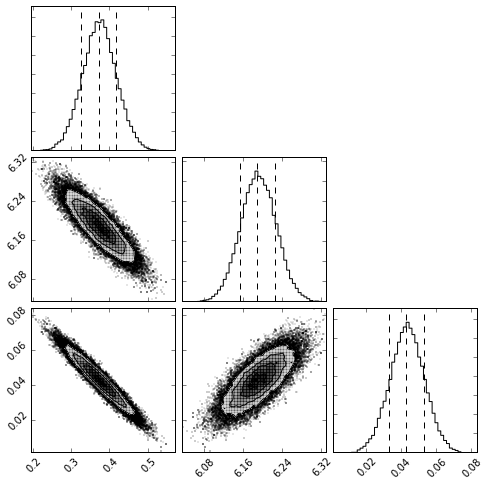

In [33]:
triangle.corner(quadsampler.flatchain, quantiles=[0.16,0.5,0.84]),

## Now a third term!

In [34]:
def poly_model(params, x):
    m, b, a, c = params
    return c*x**3 + a*x**2 + m*x + b

In [35]:
def lnprob_poly(params, x, y, yerr):
    return ln_likelihood(x, y, yerr, poly_model, params) + ln_prior(params)

In [36]:
NWALKERS = 100
NDIMS = 4

theta0 = np.zeros(shape=(NWALKERS,NDIMS))
for i in range(NDIMS):
    theta0[:,i] = np.random.uniform(-100,100,NWALKERS)

In [37]:
polysampler = emcee.EnsembleSampler(NWALKERS, NDIMS, lnprob_poly, args=[x,y,yerr])

In [38]:
NBURN = 100
theta, prob, state = polysampler.run_mcmc(theta0, NBURN)

In [39]:
polysampler.reset()

In [40]:
NSTEPS = 1000
theta2, prob2, state2 = polysampler.run_mcmc(theta, NSTEPS)

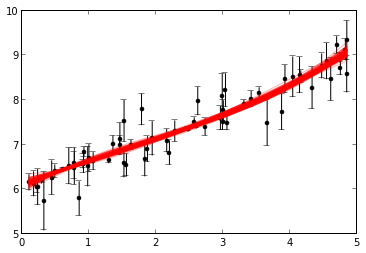

In [41]:
plot_data()

for th in theta2:
    plt.plot(x, poly_model(th,x), 'r-', alpha=0.3)

In [42]:
triangle.corner(polysampler.flatchain, quantiles=[0.16,0.5,0.84]),

Quantiles:
[(0.16, 0.46705955193805393), (0.5, 0.62390297978688758), (0.84, 0.7869910653637634)]
Quantiles:
[(0.16, 6.0022558731753222), (0.5, 6.0795655899334475), (0.84, 6.1569061161973631)]
Quantiles:
[(0.16, -0.16048687463457828), (0.5, -0.082153481208778925), (0.84, -0.0076326318584182401)]
Quantiles:
[(0.16, 0.0068652553797233125), (0.5, 0.016597513416060639), (0.84, 0.026907755789117412)]


(<matplotlib.figure.Figure at 0x103fb8e10>,)